In [7]:
#import important dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
web_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=12
page_size=100
reviews=[]

for i in range(1,pages+1):
    
    print(f"scraping page{i}")
    
    #creating the url
    url=f"{web_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    #collecting the html data from this url
    response=requests.get(url)
    
    #parse content
    content=response.content
    parsed_content=BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print("----->"," ",len(reviews)," ","total reviews")
    

scraping page1
----->   100   total reviews
scraping page2
----->   200   total reviews
scraping page3
----->   300   total reviews
scraping page4
----->   400   total reviews
scraping page5
----->   500   total reviews
scraping page6
----->   600   total reviews
scraping page7
----->   700   total reviews
scraping page8
----->   800   total reviews
scraping page9
----->   900   total reviews
scraping page10
----->   1000   total reviews
scraping page11
----->   1100   total reviews
scraping page12
----->   1200   total reviews


In [16]:
df=pd.DataFrame()
df["reviews"]=reviews
df.head()

,reviews
0,✅ Trip Verified | A serious medical problem a...
1,✅ Trip Verified | I haven't flown British Air...
2,Not Verified | My itinerary was supposed to b...
3,✅ Trip Verified | Busy day at LHR and flight ...
4,✅ Trip Verified | Worst seats I have ever enco...


In [18]:
df["text"]=df["reviews"].str.replace(r'[^\w\s]','')

C:\Users\elcot\AppData\Local\Temp\ipykernel_2884\713915804.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"]=df["reviews"].str.replace(r'[^\w\s]','')


In [20]:
df.head()

,reviews,text
0,✅ Trip Verified | A serious medical problem a...,Trip Verified A serious medical problem app...
1,✅ Trip Verified | I haven't flown British Air...,Trip Verified I havent flown British Airway...
2,Not Verified | My itinerary was supposed to b...,Not Verified My itinerary was supposed to be...
3,✅ Trip Verified | Busy day at LHR and flight ...,Trip Verified Busy day at LHR and flight fu...
4,✅ Trip Verified | Worst seats I have ever enco...,Trip Verified Worst seats I have ever encoun...


In [21]:
df["text"]=df["text"].str.replace(r'\bTrip Verified\b|\bNot Verified\b','')

C:\Users\elcot\AppData\Local\Temp\ipykernel_2884\3609573535.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"]=df["text"].str.replace(r'\bTrip Verified\b|\bNot Verified\b','')


In [22]:
df.head()

,reviews,text
0,✅ Trip Verified | A serious medical problem a...,A serious medical problem appeared while I...
1,✅ Trip Verified | I haven't flown British Air...,I havent flown British Airways before and ...
2,Not Verified | My itinerary was supposed to b...,My itinerary was supposed to be Las VegasCh...
3,✅ Trip Verified | Busy day at LHR and flight ...,Busy day at LHR and flight full Lounge cro...
4,✅ Trip Verified | Worst seats I have ever enco...,Worst seats I have ever encountered in econ...


In [23]:
df["text"][0]

'    A serious medical problem appeared while I was onboard I informed the crew and they helped me out Unfortunately I was in transit but travelling further became too difficult because of how unwell I became Also I could not find my way back home in my condition Thankfully the crew has helped me in every step of the journey until I returned back home It was a stressful experience but the crew of British Airways made it way more tolerable'

In [24]:
df["reviews"][0]

'✅ Trip Verified |  A serious medical problem appeared while I was onboard. I informed the crew and they helped me out. Unfortunately I was in transit but travelling further became too difficult because of how unwell I became. Also I could not find my way back home in my condition. Thankfully the crew has helped me in every step of the journey until I returned back home. It was a stressful experience but the crew of British Airways made it way more tolerable.'

## sentiment analysis

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elcot\AppData\Roaming\nltk_data...


True

In [29]:
#polarity of each review
from textblob import TextBlob

#make sure about correct data type
df["text"]=df["text"].astype(str)

pol=lambda x:TextBlob(x).sentiment.polarity
df["polarity"]=df["text"].apply(pol)

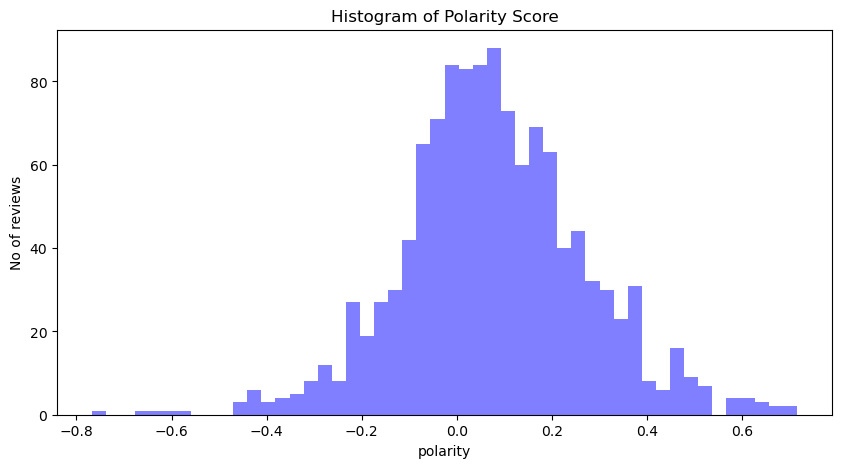

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
n,bins,patches=plt.hist(df.polarity,50,facecolor="blue",alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('No of reviews')
plt.title("Histogram of Polarity Score")
plt.show()

based on polarity score where **1** means **positive statement** and **-1** means a **negative statement**. positive reviews more than negative review.not much different between positive and negative reviews.more over there are mixed reviews or **netural reviews.**

Text(0.5, 1.0, 'Distribution of subjectivity score')

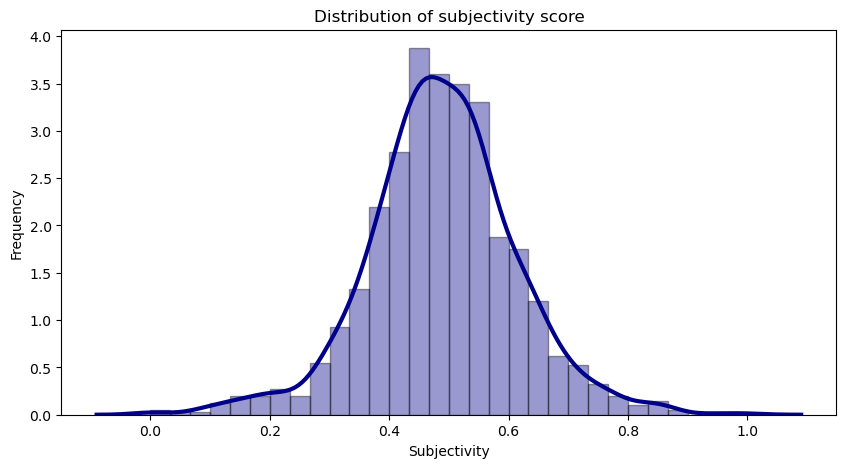

In [40]:
#creating subjectivity scores
df["subjectivity"]=df["text"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

import warnings
warnings.filterwarnings("ignore")

#density plot and histogram of subjectivity score for reviews
plt.figure(figsize=(10,5))
sns.distplot(df["subjectivity"],hist=True,kde=True,bins=int(30),
             color="darkblue",hist_kws={'edgecolor':'black'},kde_kws={'linewidth':3})
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Distribution of subjectivity score')

In sentiment analysis, subjectivity is also a float that lies in the **range of [0,1]**. When it is close to **0**, it is more about **facts**. When subjectivity increases, it comes close to be an **opinion**. this plot looks like **symmentric curve**. in this reviews both **facts and opinon** are equally distributed.